In [1]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')

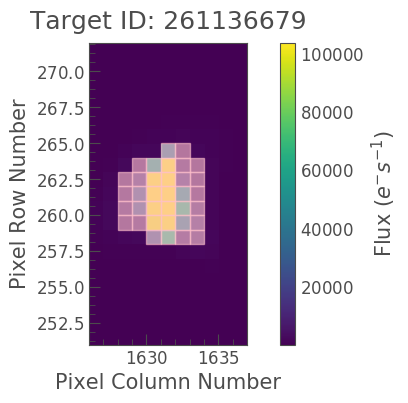

In [9]:
import numpy as np

# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

In [10]:
tpf.targetid

261136679

In [11]:
tpf.interact(notebook_url='localhost:8889')

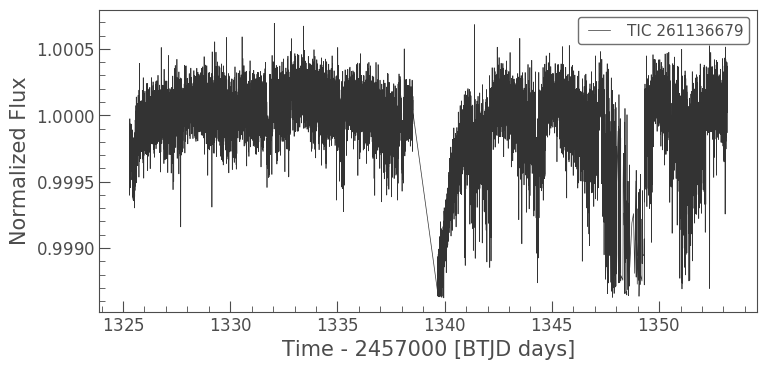

In [12]:
lc = tpf.to_lightcurve(aperture_mask = aperture_mask).remove_outliers()
lc.plot()

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


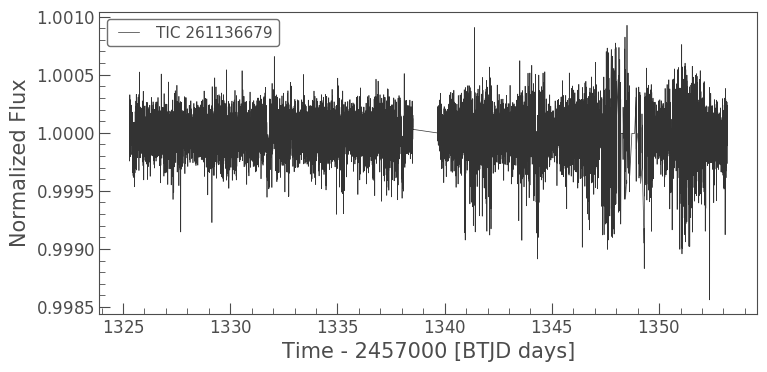

In [13]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.plot()

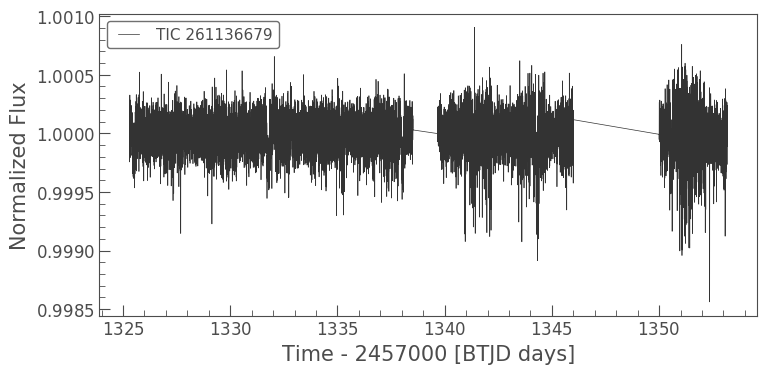

In [14]:
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask].remove_nans()
masked_lc.plot()

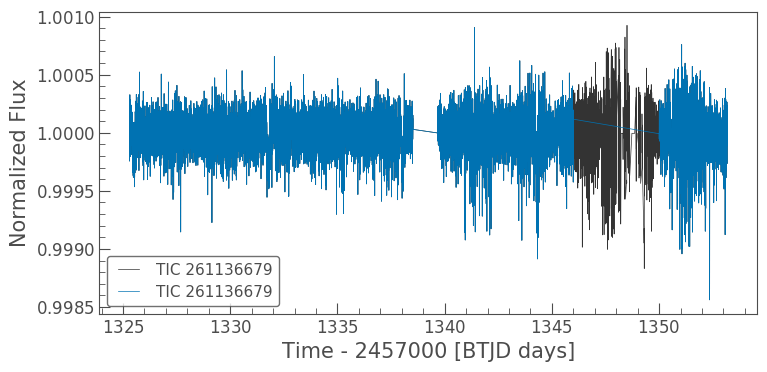

In [15]:
ax = flat_lc.plot()
masked_lc.plot(ax=ax)

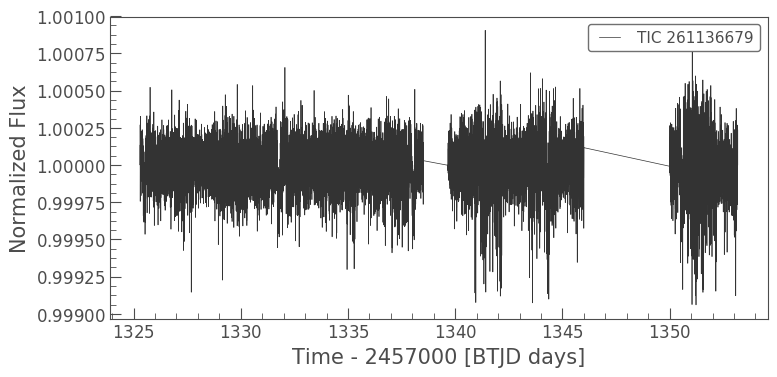

In [16]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.plot()

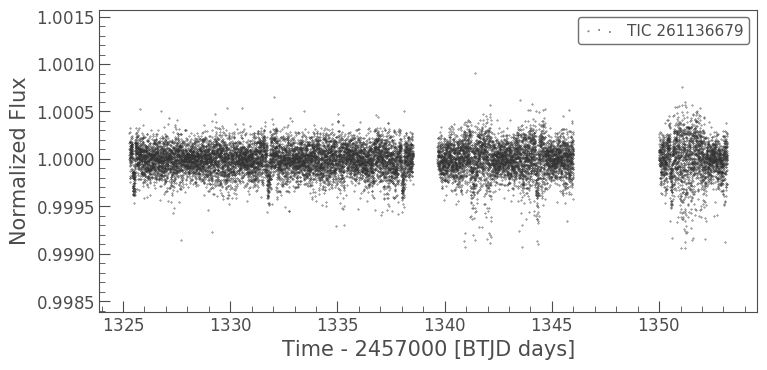

In [17]:
clipped_lc.scatter(s=0.1)

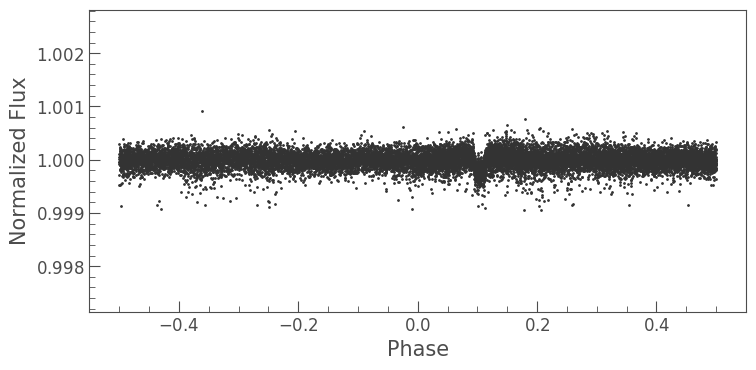

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'http://localhost:8891';                       use --allow-websocket-origin=localhost:8891 to permit this; currently we allow origins {'localhost:8889'}


In [18]:
clipped_lc.fold(period=6.27,phase=.3).scatter()

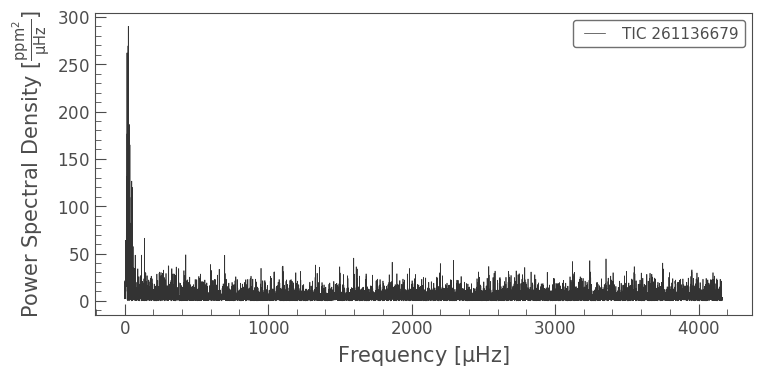

In [19]:
import astropy.units as u
pg = clipped_lc.to_periodogram(freq_unit=u.microhertz)
pg.plot()


Doesn't look like theres any seismic peaks. The solar numax lies at 3090.0 microhertz.

It also looks like the evenly spaced grid of frequencies isn't sampling the very low frequency space (high period) well, given that we're looking at 6 days. Lets pass in a custom grid of periods.

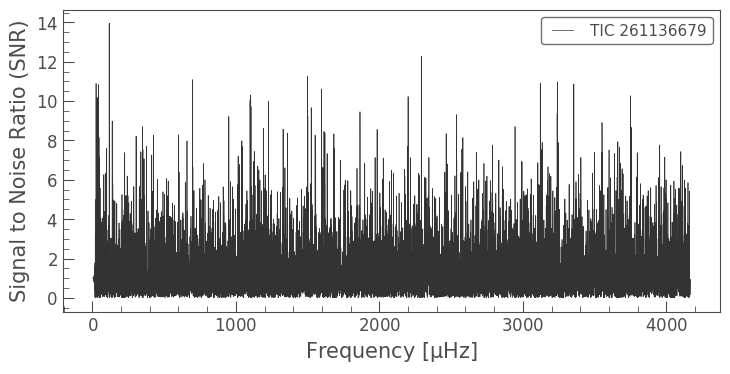

In [20]:
snr = pg.flatten()
snr.plot()

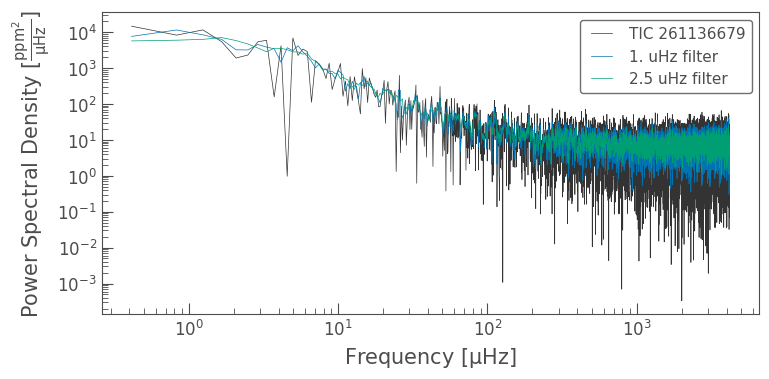

In [21]:
pg = lc.to_periodogram(freq_unit = u.microhertz)
ax = pg.plot()
pg.smooth(filter_width = 1.).plot(label='1. uHz filter', ax=ax)
pg.smooth(filter_width = 2.5).plot(label='2.5 uHz filter', ax=ax,scale='log')

In [29]:
snr.plot_dnu_diagnostics(numax=2600*u.microhertz)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.